In [1]:
library(dplyr)
library(readr)
install.packages("caret")
library(caret)
install.packages("survminer")
library(survminer)
install.packages("survival")
library(survival)
install.packages("ggplot2")
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘markdown’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘

In [2]:
# Instalar y cargar las bibliotecas necesarias
install.packages("googledrive")
library(googledrive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Autenticarse con Google Drive
drive_auth()

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=68244688f69929cfe551d0279083659f&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVR4M0xZNjZneXN6RzFGaVY0UDJhdVdCd0lyZzBabFlwbTg5R1VKMExFWFZYUnlGd3AtQl9YcjJYN1pWSFNQcVJYQXlOQSIsInN0YXRlIjoiNjgyNDQ2ODhmNjk5MjljZmU1NTFkMDI3OTA4MzY1OWYifQ==


In [46]:
# Especificar el ID del archivo y la ruta de destino
file_id <- "https://drive.google.com/file/d/1W8CkCuAkZoFvAgxLUVZKs0u_h6bMybBd/view?usp=drivesdk"  # Reemplaza este ID con el ID de tu archivo
drive_download(as_id(file_id), path = "archivo.csv", overwrite = TRUE)

File downloaded:

• Documento de César García <id: 1W8CkCuAkZoFvAgxLUVZKs0u_h6bMybBd>

Saved locally as:

• archivo.csv



In [47]:
# Leer el archivo CSV desde la URL
urlAge <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/machine_age.csv"
urlMechanic <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/mechanic_antiquity.csv"
df <- read_csv("archivo.csv", show_col_types = FALSE)
df_age <- read_csv(urlAge, show_col_types = FALSE)
df_mechanic <- read_csv(urlMechanic, show_col_types = FALSE)

In [48]:
summary(df)

   equipment        operation           wo_type           base_model       
 Min.   : 100268   Length:149066      Length:149066      Length:149066     
 1st Qu.:1023935   Class :character   Class :character   Class :character  
 Median :1078773   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1017279                                                           
 3rd Qu.:1149220                                                           
 Max.   :1169630                                                           
 problem_code       problem_desc       failure_code       failure_desc      
 Length:149066      Length:149066      Length:149066      Length:149066     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

In [49]:
head(df,5)

equipment,operation,wo_type,base_model,problem_code,problem_desc,failure_code,failure_desc,cause_code,cause_desc,⋯,action_desc,mechanic,date,downtime_gross,pit_coverage,real_downtime,parts_cost,repair_hours,waiting_hours,changed_pcs
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
100268,BIND LEG,Calibration,VF2500,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC001,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,⋯,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Erick Garcia Lima,7/14/2023,0.08333333,0.08,0.003333333,$0.74,0.08333333,0,0
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC017,Misadjusted machine head teeth / Dientes de cabezal desajustados,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,10/3/2023,1.25000000,0.00,1.250000000,$16.81,1.25000000,0,1
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC017,Misadjusted machine head teeth / Dientes de cabezal desajustados,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,10/3/2023,1.25000000,0.00,1.250000000,$16.81,1.25000000,0,1
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC012,Misadjusted machine head needle bar / Barra de aguja de cabezal desajustada,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,1/17/2024,3.00000000,3.00,0.000000000,$12.50,2.00000000,1,2
100312,BARTACK,Corrective Maintenance,LT2-B872,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC005,Broken machine head ball joint / Rotura de biela de cabezal,⋯,Replace machine head ball joint / Reemplazar biela de cabezal,JERONIMO FUNEZ,3/18/2023,0.25000000,0.00,0.250000000,$2.67,0.25000000,0,0


**ANALISIS DE VARIABLES**

In [50]:
dim(df)

[1] 149066     21

In [51]:
# Calcular la frecuencia de cada operación
operation_freq <- df %>%
  group_by(operation) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
operation_freq <- operation_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))

operation_freq

operation,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
HEM SLEEVE,26821,26821,0.1799270
HEM BOTTOM,17016,43837,0.2940778
SET SLEEVE,8557,52394,0.3514819
JOIN PANEL,8537,60931,0.4087518
TAPE SHOULDER,8017,68948,0.4625334
HEM AROUND,5749,74697,0.5011002
FLAT SEAM,5521,80218,0.5381375
JOIN SHOULDER,5227,85445,0.5732025
ATTACH ELASTIC,4947,90392,0.6063891


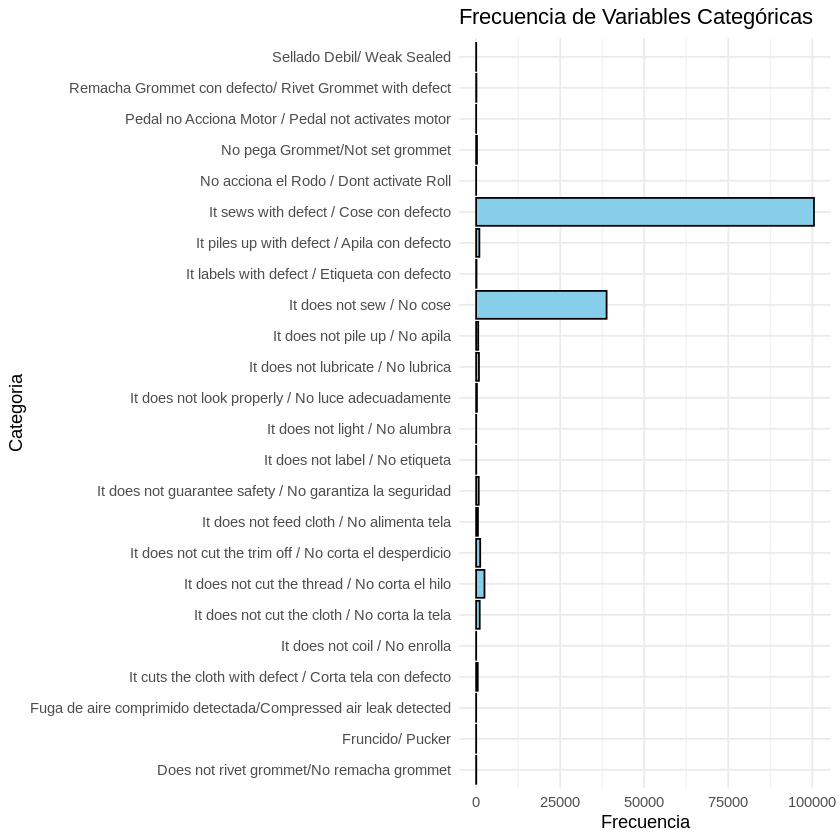

In [52]:
# Crear el gráfico de barras
ggplot(df, aes(y = problem_desc)) +
  geom_bar(fill = 'skyblue', color = 'black') +
  labs(title = 'Frecuencia de Variables Categóricas',
       x = 'Frecuencia',
       y = 'Categoria') +
  theme_minimal()

In [53]:
# Crear el gráfico de barras
ggplot(df, aes(y = failure_desc)) +
  geom_bar(fill = 'skyblue', color = 'black') +
  labs(title = 'Frecuencia de Variables Categóricas',
       x = 'Frecuencia',
       y = 'Categoria') +
  theme_minimal()

ERROR while rich displaying an object: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : invalid string in PangoCairo_Text

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. 

In [54]:
# Calcular la frecuencia de causas de fallo
cause_freq <- df %>%
  group_by(cause_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
cause_freq <- cause_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
cause_freq

Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“in

In [ ]:
# Calcular la frecuencia de acciones correctivas
action_freq <- df %>%
  group_by(action_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
action_freq <- action_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
action_freq

Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“in

In [ ]:
# Calcular la frecuencia de acciones correctivas
mechanic_freq <- df %>%
  group_by(mechanic) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
mechanic_freq <- mechanic_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
mechanic_freq

In [ ]:
# Crear el boxplot de repair_hours
ggplot(df, aes(y = repair_hours)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de repair hours',
       y = 'Costo de partes') +
  theme_minimal()

In [ ]:
# Histograma de 'downtimeGross'
hist_downtimeGross <- ggplot(df, aes(x = downtime_gross)) +
  geom_histogram(binwidth = 0.1, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de Downtime Bruto",
       x = "Downtime Bruto (horas)",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_downtimeGross)

**LIMPIEZA DE DATOS**

In [ ]:
sapply(df, function(x) sum(is.na(x)))

In [ ]:
# Remover el símbolo de dólar y las comas, y convertir a float
df$parts_cost <- as.numeric(gsub("[\\$,()]", "", df$parts_cost))

In [ ]:
# Crear el boxplot de parts_cost
ggplot(df, aes(y = parts_cost)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de parts cost',
       y = 'Costo de partes') +
  theme_minimal()

In [ ]:
# Convertir la columna 'Date' al formato adecuado
df$date <- as.Date(df$date, format="%m/%d/%Y")  # Ajusta el formato según tus datos
# Ordenar el DataFrame por fecha
df <- df %>%
  arrange(date)

In [ ]:
mean(df$downtime_gross < 0)

In [ ]:
# Filtrar registros donde downtimeGross no sea negativo
df_filtered <- df %>%
  filter(downtime_gross >= 0)

In [ ]:
mean(df$repair_hours < 0)

In [ ]:
# Calcular valor absoluto de repair hours
df$repair_hours <- abs(df$repair_hours)

In [ ]:
#Eliminar columnas que no seran utilizadas
df <- select(df, -problem_code, -failure_code, -cause_code, -action_code, -pit_coverage, -real_downtime, -waiting_hours)

In [ ]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
df <- df %>%
  filter(`wo_type` == "Corrective Maintenance")

In [ ]:
# Calcular la diferencia en días entre fechas consecutivas
df <- df %>%
  group_by(equipment) %>%
  mutate(Days_Between_Failures = difftime(date, lag(date), units = "days"))

# Reemplazar los valores NA en Days_Between_Failures
df$Days_Between_Failures[is.na(df$Days_Between_Failures)] <- as.numeric(difftime(df$date[is.na(df$Days_Between_Failures)], as.Date("2023-01-01"), units = "days"))

In [ ]:
# Convertir 'Days_Between_Failures' a numeric
df$Days_Between_Failures <- as.numeric(df$Days_Between_Failures, units = "days")

**ANALISIS DE VARIABLE OBJETIVO**

In [ ]:
# Crear el boxplot de daysbetween_failures
ggplot(df, aes(y = Days_Between_Failures)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de Days Between Failures',
       y = 'Días entre Fallas') +
  theme_minimal()

In [ ]:
# Histograma de 'Days_Between_Failures'
hist_days_failures <- ggplot(df, aes(x = Days_Between_Failures)) +
  geom_histogram(binwidth = 3, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de days between failures",
       x = "Días",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_days_failures)

**MODELO DE REGRESION LINEAL INICIAL PARA PREDECIR DOWNTIME**



In [ ]:
df <- select(df, -wo_type)

In [ ]:
head(df,5)

In [ ]:
# Inicializar y ajustar el modelo de regresión lineal
model1 <- lm(downtime_gross~. -equipment -downtime_gross -repair_hours -Days_Between_Failures -date, data = df)
# Resumen del modelo
summary(model1)

**CALCULO DE VARIABLES PARA MEJORA DEL AJUSTE**

In [ ]:
#Calcular los fallos acumulativos
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Failure_Count = row_number())

In [ ]:
# Calcular la mediana de tiempo de reparación
df <- df %>%
  group_by(equipment) %>%
  mutate(Median_Repair_Time = median(repair_hours, na.rm = TRUE))

In [ ]:
# Calcular el costo acumulado de mantenimiento
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Maintenance_Cost = cumsum(parts_cost))

**MODELO DE REGRESION LINEAL PARA PREDECIR DOWNTIME CON MAS VARIABLES**

In [ ]:
# Inicializar y ajustar el modelo de regresión lineal
model2 <- lm(downtime_gross~. -equipment -downtime_gross -repair_hours -date, data = df)
# Resumen del modelo
summary(model2)

**MODELO AGREGANDO LA VARIABLE "MACHINE AGE"**

In [ ]:
# Renombrar la columna 'Equipment' a 'equipment' en df_age
df_age <- df_age %>% rename(equipment = Equipment)

In [ ]:
df_merged <- df %>%
  left_join(df_age %>% select(equipment, Age), by = "equipment")

In [ ]:
head(df_merged,3)

In [ ]:
# Inicializar y ajustar el modelo de regresión lineal
model3 <- lm(downtime_gross~. -equipment -downtime_gross -repair_hours -date, data = df_merged)
# Resumen del modelo
summary(model3)

**MODELO AGREGANDO LA VARIABLE "MECHANIC ANTIQUITY"**

In [ ]:
df_merged2 <- df_merged %>%
  left_join(df_mechanic %>% select(mechanic, antiquity), by = "mechanic")

In [ ]:
# Inicializar y ajustar el modelo de regresión lineal
model4 <- lm(downtime_gross~. -equipment -downtime_gross -repair_hours -date, data = df_merged2)
# Resumen del modelo
summary(model4)

**IMPLEMENTACION DE BACKWARD**

In [ ]:
sapply(df_merged2, function(x) sum(is.na(x)))

In [ ]:
head(df_mechanic,50)

In [ ]:
df_merged2 %>%
  filter(is.na(antiquity))

In [ ]:
# Realizar backward elimination
model_final <- step(model5, direction = "backward")
model_final$anova

In [ ]:
formula = as.formula("Days_Between_Failures ~ operation + base_model + mechanic + downtime_gross +
    parts_cost + Cumulative_Failure_Count + Median_Repair_Time +
    Cumulative_Maintenance_Cost + Age")

In [ ]:
# Inicializar y ajustar el modelo de regresión lineal
model6 <- lm(formula = formula, data = df_merged3)
# Resumen del modelo
summary(model6)

**ANALISIS DE SUPERVIVENCIA PARA MAQUINARIA DE RUEDO DE MANGA**

In [ ]:
# Cargar datos
url <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/maquina2.csv"
data <- read_csv(url, show_col_types = FALSE)

In [ ]:
head(data,5)

In [ ]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
data <- data %>%
  filter(`WO Type` == "Corrective Maintenance")
data <- data%>%
  filter(Operation == "HEM SLEEVE")

In [ ]:
# Convertir la columna 'Date' al formato adecuado
data$Date <- as.Date(data$Date, format="%m/%d/%Y")  # Ajusta el formato según tus datos

# Ordenar por equipo y fecha
data <- data %>% arrange(Equipment, Date)

# Calcular el tiempo entre fallas y si la falla ocurrió
data <- data %>%
  group_by(Equipment) %>%
  mutate(Previous_Failure_Date = lag(Date),
         Days_Between_Failures = as.numeric(Date - Previous_Failure_Date),
         Event_Occurred = ifelse(is.na(Previous_Failure_Date), 0, 1)) %>%
  ungroup()

# Eliminar filas con NA en 'Days_Between_Failures'
data <- data %>% filter(!is.na(Days_Between_Failures))

In [ ]:
head(data,5)

In [ ]:
# Convertir las variables categóricas a factores
data$Equipment <- as.factor(data$Equipment)
data$Operation <- as.factor(data$Operation)
data$Model.Base <- as.factor(data$`Model Base`)
data$Problem.Code <- as.factor(data$`Problem Code`)
data$Failure.Code <- as.factor(data$`Failure Code`)
data$Cause.Code <- as.factor(data$`Cause Code`)
data$Action.Code <- as.factor(data$`Action Code`)

In [ ]:
cox_model <- coxph(Surv(Days_Between_Failures, Event_Occurred) ~
                  Model.Base + Problem.Code + Failure.Code + Cause.Code +
                   Action.Code + downtimeGross + partsCost +repairHours, data = data)

In [ ]:
# Resumen del modelo
summary(cox_model)

In [ ]:
# Curvas de supervivencia ajustadas
fit <- survfit(cox_model)
ggsurvplot(fit, data = data, risk.table = TRUE, pval = TRUE,
           title = "Curvas de Supervivencia Ajustadas",
           xlab = "Tiempo (días)", ylab = "Probabilidad de Supervivencia")


In [ ]:
# Imprimir el resumen del ajuste para ver la mediana de supervivencia
summary_fit <- summary(fit)
print(summary_fit)

# Obtener la mediana de supervivencia
median_survival <- summary_fit$time[which.min(abs(summary_fit$surv - 0.5))]
print(paste("La mediana de supervivencia es:", median_survival, "días"))

In [ ]:
library(ggplot2)
library(survminer)

# Graficar la curva de supervivencia con la mediana de supervivencia resaltada
plot <- ggsurvplot(fit, data = data, risk.table = TRUE, pval = TRUE,
                   title = "Curvas de Supervivencia Ajustadas",
                   xlab = "Tiempo (días)", ylab = "Probabilidad de Supervivencia",
                   conf.int = TRUE)

# Añadir línea vertical y anotación para la mediana de supervivencia
plot$plot <- plot$plot +
  geom_vline(xintercept = median_survival, linetype = "dashed", color = "red") +
  annotate("text", x = median_survival, y = 0.5, label = paste("Mediana =", median_survival, "días"), vjust = -1, color = "red")

print(plot)